In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import pandas as pd
import seaborn as sns

In [3]:
temp = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\temp.csv')
test = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\test.csv')
sample_submission = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\sample_submission.csv')

In [4]:
train = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\train.csv')
transactions = pd.read_csv(r'C:\Users\user\upstage3-python\09.ML_project_team03\assets\data\transactions3.csv')

In [8]:
# 2016년 4월 16일부터 29일까지의 2주간의 sales 데이터를 2016년 4월 9일~15일 일주일간의 sales의 데이터에서 그 요일에 해당하는 데이터로 대체할거야. 
# 데이터들은 store_nbr, family, day_of_week 값이 같은 경우에만 대체해야 해. 
# 그런데 transactions에 비례해서 sales의 값을 정할거야. 


import pandas as pd
import numpy as np

temp['date'] = pd.to_datetime(temp['date'])

# 필터링할 날짜 범위 설정
target_start_date = "2016-04-16"
target_end_date = "2016-04-29"
source_start_date = "2016-04-09"
source_end_date = "2016-04-15"

# 타겟 데이터와 소스 데이터 필터링
target_temp = temp[(temp['date'] >= target_start_date) & (temp['date'] <= target_end_date)]
source_temp = temp[(temp['date'] >= source_start_date) & (temp['date'] <= source_end_date)]

# 데이터 대체 함수
def replace_sales(target_temp, source_temp):
    new_sales = []
    
    for index, row in target_temp.iterrows():
        matching_source_temp = source_temp[
            (source_temp['store_nbr'] == row['store_nbr']) &
            (source_temp['family'] == row['family']) &
            (source_temp['day_of_week'] == row['day_of_week'])
        ]
        
        if not matching_source_temp.empty:
            source_row = matching_source_temp.iloc[0]
            
            # 트랜잭션 비례로 sales 계산
            transaction_ratio = row['transactions'] / source_row['transactions']
            adjusted_sales = source_row['sales'] * transaction_ratio
            new_sales.append(adjusted_sales)
        else:
            new_sales.append(row['sales'])  # 매칭되는 소스 데이터가 없을 경우 원래 sales 값을 사용
    
    target_temp['sales'] = new_sales
    return target_temp

# 타겟 데이터를 대체 데이터로 변경
temp.loc[(temp['date'] >= target_start_date) & (temp['date'] <= target_end_date), 'sales'] = replace_sales(target_temp, source_temp)['sales']

print(temp[(temp['date'] >= target_start_date) & (temp['date'] <= target_end_date)])


C:\Users\user\AppData\Local\Temp\ipykernel_24928\2354868981.py:36: RuntimeWarning: invalid value encountered in scalar divide
  transaction_ratio = row['transactions'] / source_row['transactions']


              date  store_nbr                      family        sales  \
39534   2016-04-16          1                  AUTOMOTIVE     4.175411   
39535   2016-04-16          1                   BABY CARE     0.000000   
39536   2016-04-16          1                      BEAUTY     2.087706   
39537   2016-04-16          1                   BEVERAGES  2324.660141   
39538   2016-04-16          1                       BOOKS     0.000000   
...            ...        ...                         ...          ...   
2985307 2016-04-29          9                     POULTRY   402.340777   
2985308 2016-04-29          9              PREPARED FOODS    62.948896   
2985309 2016-04-29          9                     PRODUCE   974.987140   
2985310 2016-04-29          9  SCHOOL AND OFFICE SUPPLIES     4.936394   
2985311 2016-04-29          9                     SEAFOOD    17.503465   

         onpromotion   city      state type  cluster  transactions  ...  year  \
39534              0  Quito  P

C:\Users\user\AppData\Local\Temp\ipykernel_24928\2354868981.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_temp['sales'] = new_sales


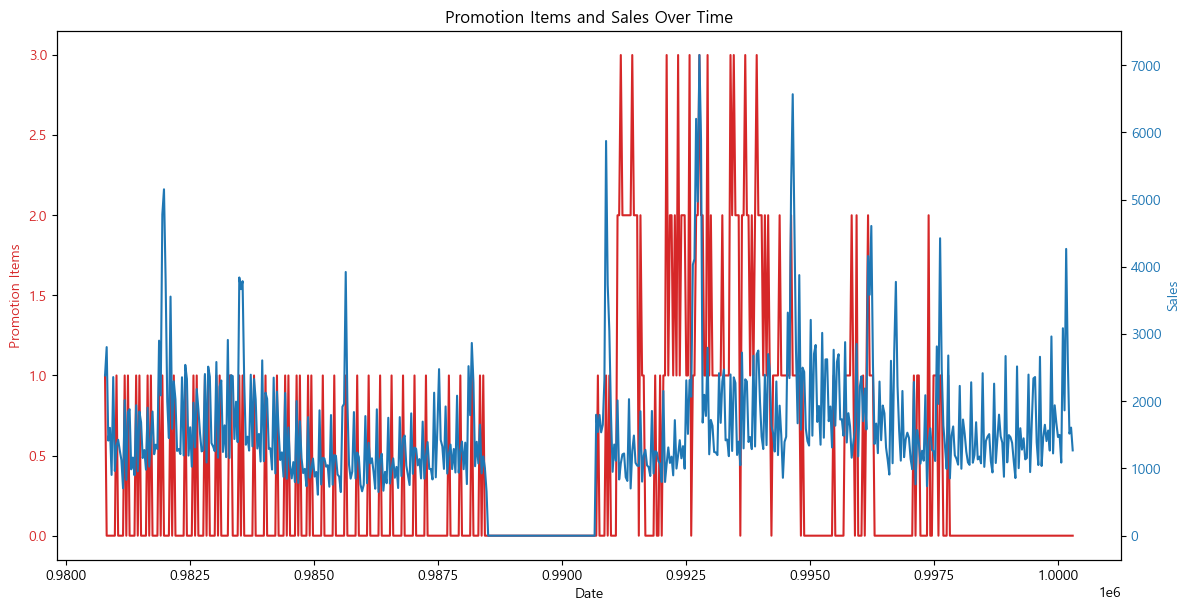

Correlation between promotion items and sales: 0.34582557351022325


In [80]:
import pandas as pd

# 예시 데이터 로드 GROCERY I           HOME APPLIANCES BEVERAGES
#data = temp[(temp['year'].isin([2016,2017]))&(temp.store_nbr==25)&(temp.family=='PRODUCE')][['date', 'sales', 'onpromotion', 'transactions','day_of_week']]
#data = temp[(temp['year'].isin([2016,2017]))&(temp.store_nbr==25)&(temp.family=='PRODUCE')][['date', 'sales', 'onpromotion', 'onpromotion_lag1', 'onpromotion_lag2', 'transactions','day_of_week']]
#data = temp[(temp['year'].isin([2016,2017]))&(temp.store_nbr==25)&(temp.family=='BEVERAGES')][['date', 'sales', 'onpromotion_lag1', 'transactions','day_of_week']]
data = temp[(temp['year'].isin([2016,2017]))&(temp.store_nbr==25)&(temp.family=='PRODUCE')][['date', 'sales', 'onpromotion_lag1', 'transactions','day_of_week']]

import matplotlib.pyplot as plt

# 시각화
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Promotion Items', color=color)
ax1.plot(data.index, data['onpromotion_lag1'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Sales', color=color)
ax2.plot(data.index, data['sales'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Promotion Items and Sales Over Time')
plt.show()


# 상관분석
correlation = data['onpromotion_lag1'].corr(data['sales'])
print(f'Correlation between promotion items and sales: {correlation}')


In [81]:
# Convert day_of_week to a categorical variable
data['day_of_week'] = data['day_of_week'].astype('category')

In [82]:
# Create dummy variables for the day_of_week column
data = pd.get_dummies(data, columns=['day_of_week'])

In [83]:
from scipy.stats import linregress
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    return mape

In [84]:
data['slope7'] = data['sales'].rolling(7).apply(get_slope, raw=True)
data['std7'] = data['sales'].rolling(7).std(raw=True)
data['mean7'] = data['sales'].rolling(7).mean(raw=True)
data['skew7'] = data['sales'].rolling(7).skew()
data['kurt7'] = data['sales'].rolling(7).kurt()
data['min7'] = data['sales'].rolling(7).min()
data['max7'] = data['sales'].rolling(7).max()

data['slope14'] = data['sales'].rolling(14).apply(get_slope, raw=True)
data['std14'] = data['sales'].rolling(14).std(raw=True)
data['mean14'] = data['sales'].rolling(14).mean(raw=True)
data['skew14'] = data['sales'].rolling(14).skew()
data['kurt14'] = data['sales'].rolling(14).kurt()
data['min14'] = data['sales'].rolling(14).min()
data['max14'] = data['sales'].rolling(14).max()

C:\Users\user\AppData\Local\Temp\ipykernel_29752\787891233.py:2: FutureWarning: Passing additional kwargs to Rolling.std has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  data['std7'] = data['sales'].rolling(7).std(raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_29752\787891233.py:3: FutureWarning: Passing additional kwargs to Rolling.mean has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  data['mean7'] = data['sales'].rolling(7).mean(raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_29752\787891233.py:10: FutureWarning: Passing additional kwargs to Rolling.std has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  data['std14'] = data['sales'].rolling(14).std(raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_29752\787891233.py:11: FutureWarning: Passing additional kwargs to Rolling.mean has no impact on the r

In [85]:
data.dropna(inplace=True)

In [12]:
#X = data[['onpromotion', 'transactions', 'slope7' ,'std7','mean7','skew7','kurt7','min7','max7','slope14' ,'std14','mean14','skew14','kurt14','min14','max14'] + [col for col in data.columns if 'day_of_week' in col]]
X = data[['onpromotion_lag1', 'transactions', 'slope7' ,'std7','mean7','skew7','kurt7','min7','max7','slope14' ,'std14','mean14','skew14','kurt14','min14','max14'] + [col for col in data.columns if 'day_of_week' in col]]

y = data['sales']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

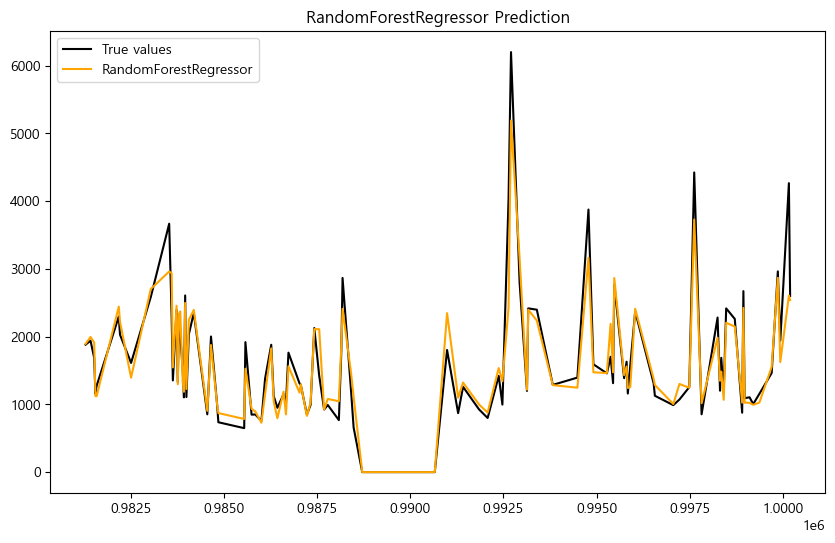

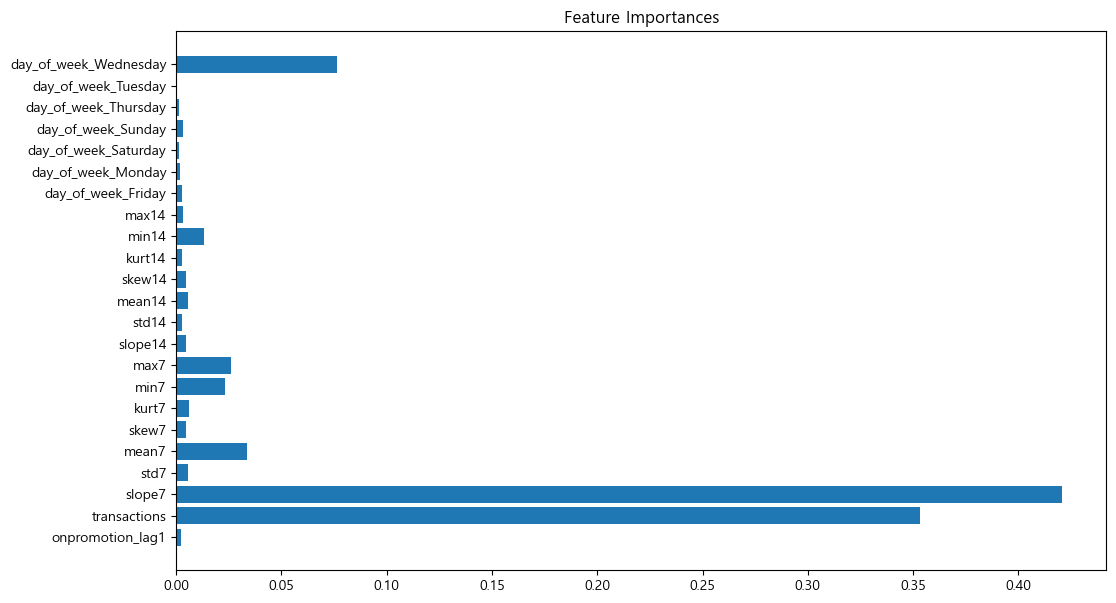

RandomForestRegressor MSE: 101752.14067412277
RandomForestRegressor R2: 0.9043285484292174
RandomForestRegressor RMSLE: 0.14393934437339734


In [17]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Instantiate the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# 시각화를 위해 테스트 데이터와 예측 데이터를 데이터프레임으로 변환
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf}, index=y_test.index)

# 인덱스를 기준으로 정렬
results.sort_index(inplace=True)

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual'], color="black", label="True values")
plt.plot(results.index, results['Predicted'], color="orange", label="RandomForestRegressor")
plt.legend(loc="upper left")
plt.title('RandomForestRegressor Prediction')
plt.show()

# feature importance for decision tree
plt.figure(figsize=(12, 7))
plt.barh(X_train.columns, rf.feature_importances_)
plt.title('Feature Importances')
plt.show()

# RMSLE 계산 함수 정의
def root_mean_squared_log_error(actual, predicted):
    log_diff = np.log1p(predicted) - np.log1p(actual)
    return np.sqrt(np.mean(log_diff**2))

# Evaluate
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
rmsle_test = root_mean_squared_log_error(y_test, y_pred_rf)

print(f'RandomForestRegressor MSE: {mse_rf}')
print(f'RandomForestRegressor R2: {r2_rf}')
print(f"RandomForestRegressor RMSLE: {rmsle_test}")


## 최종 submission

In [ ]:
''' 
# day_of_week
test['date'] = pd.to_datetime(test['date'])
test['day_of_week'] = test['date'].dt.day_name()
test['day_of_week'] = test['day_of_week'].astype('category')
test = pd.get_dummies(test, columns=['day_of_week'])

# onpromotion_lag
for lag in [1]:
    test[f'onpromotion_lag{lag}'] = test['onpromotion'].shift(lag).fillna(0)

   
# transactions :2017-06-01 ~ 2017-08-15 기간동안 요일별 평균 transactions

data_frames = []

for store in range(1, 55):
    filtered_df = transactions[(transactions['date']>='2017-06-01')&(transactions['date']<='2017-08-15')&(transactions['store_nbr']==store)]
    filtered_test = test[(test['store_nbr']==store)]
    filtered_test['date'] = pd.to_datetime(filtered_test['date'])
    filtered_test['day_of_week'] = filtered_test['date'].dt.day_name()
    
    avg_transactions = filtered_df.groupby('day_of_week')['transactions'].mean().reset_index()

    merged_test = pd.merge(filtered_test, avg_transactions, how='left', on='day_of_week', suffixes=('', '_for_test')) 
    if not merged_test.empty:
                        data_frames.append(merged_test)
rfd = pd.concat(data_frames, ignore_index=True)
'''
#rolling변수 추가
# sales를 에측하고 그 값의 rolling 변수를 만든다




## 변수 만들기

C:\Users\user\AppData\Local\Temp\ipykernel_29752\1632224133.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=plottest, x='date', y='sales', palette='viridis', alpha=0.6)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


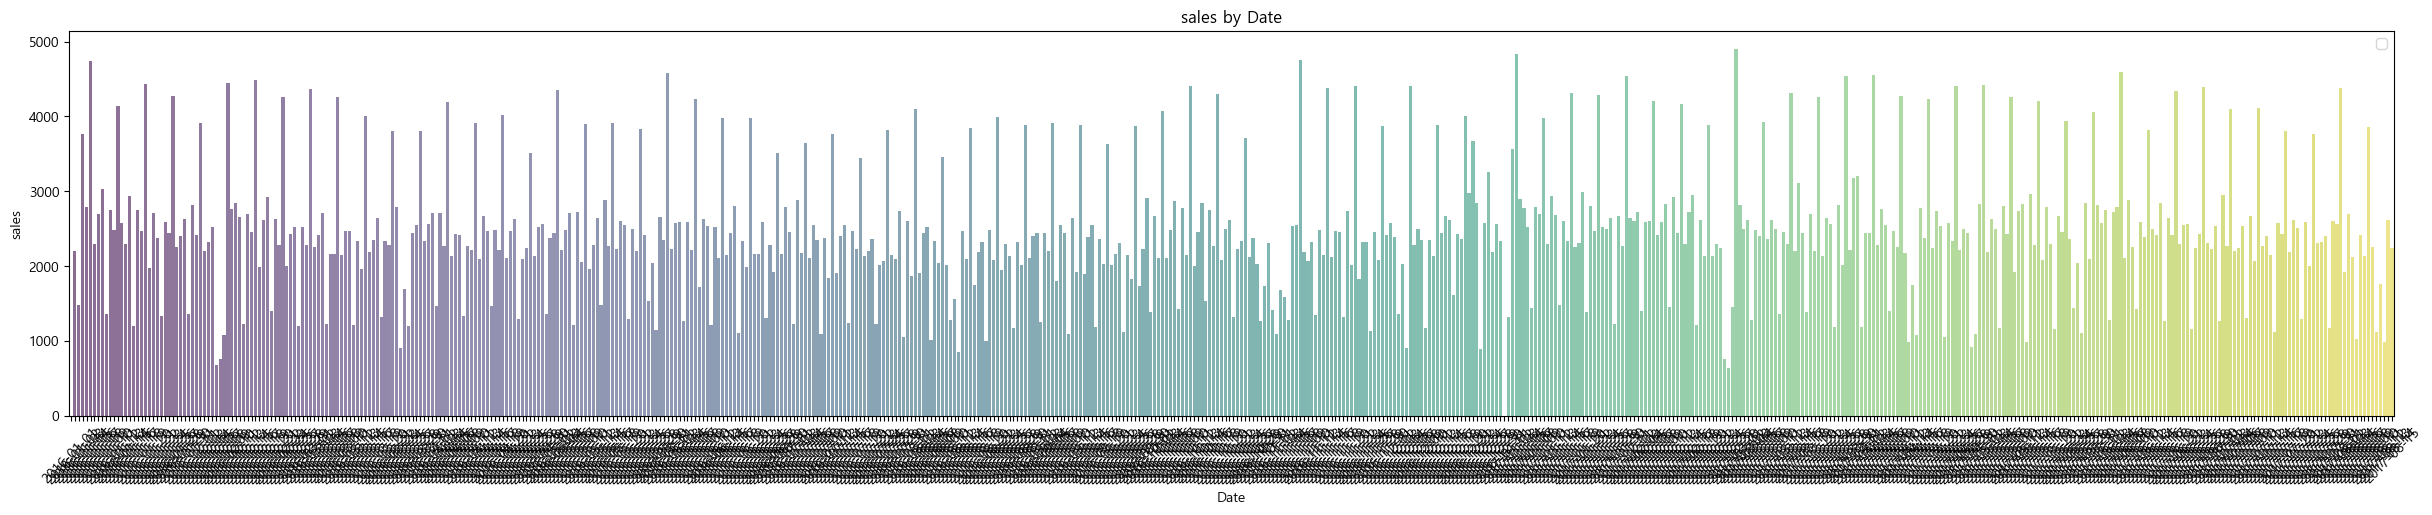

In [110]:
#plottest= temp[(temp['date']>='2017-04-01')&(temp['date']<='2017-08-15')&(temp['family']=='AUTOMOTIVE')&(temp['store_nbr']==2)]
#plottest= transactions[(transactions['date']>='2017-06-01')&(transactions['date']<='2017-08-15')&(transactions['store_nbr']==34)]
plottest= temp[(temp['date']>='2016-01-01')&(temp['date']<='2017-08-15')&(temp['store_nbr']==1)&(temp['family']=='PRODUCE')]

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 요일별 매출 시각화
plt.figure(figsize=(30, 5))

# 실제 매출 막대 그래프
sns.barplot(data=plottest, x='date', y='sales', palette='viridis', alpha=0.6)

# 막대 그래프 그리기
plt.title('sales by Date')
plt.xlabel('Date')
plt.ylabel('sales')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
pip install prophet

In [147]:
plottest

,store_nbr,family,sales,onpromotion,city,state,type,cluster,transactions,day_of_week,...,year,month,day,onpromotion_lag1,onpromotion_lag2,onpromotion_lag5,onpromotion_lag10,season,wage15th,wagelastday
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,1,PRODUCE,0.000,0,Quito,Pichincha,D,13,0.0,Friday,...,2016,1,1,0.0,0.0,0.0,0.0,Winter,0,0
2016-01-02,1,PRODUCE,2199.262,0,Quito,Pichincha,D,13,0.0,Saturday,...,2016,1,2,0.0,0.0,1.0,0.0,Winter,0,0
2016-01-03,1,PRODUCE,1479.032,1,Quito,Pichincha,D,13,0.0,Sunday,...,2016,1,3,0.0,0.0,1.0,0.0,Winter,0,0
2016-01-04,1,PRODUCE,3771.711,0,Quito,Pichincha,D,13,10.0,Monday,...,2016,1,4,0.0,0.0,0.0,0.0,Winter,0,0
2016-01-05,1,PRODUCE,2794.882,0,Quito,Pichincha,D,13,1840.0,Tuesday,...,2016,1,5,0.0,0.0,1.0,0.0,Winter,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,1,PRODUCE,1115.334,7,Quito,Pichincha,D,13,570.0,Friday,...,2017,8,11,0.0,36.0,5.0,0.0,Summer,0,0
2017-08-12,1,PRODUCE,1762.493,7,Quito,Pichincha,D,13,1004.0,Saturday,...,2017,8,12,0.0,0.0,7.0,1.0,Summer,0,0
2017-08-13,1,PRODUCE,986.669,5,Quito,Pichincha,D,13,416.0,Sunday,...,2017,8,13,0.0,0.0,5.0,0.0,Summer,0,0


18:46:19 - cmdstanpy - INFO - Chain [1] start processing
18:46:19 - cmdstanpy - INFO - Chain [1] done processing


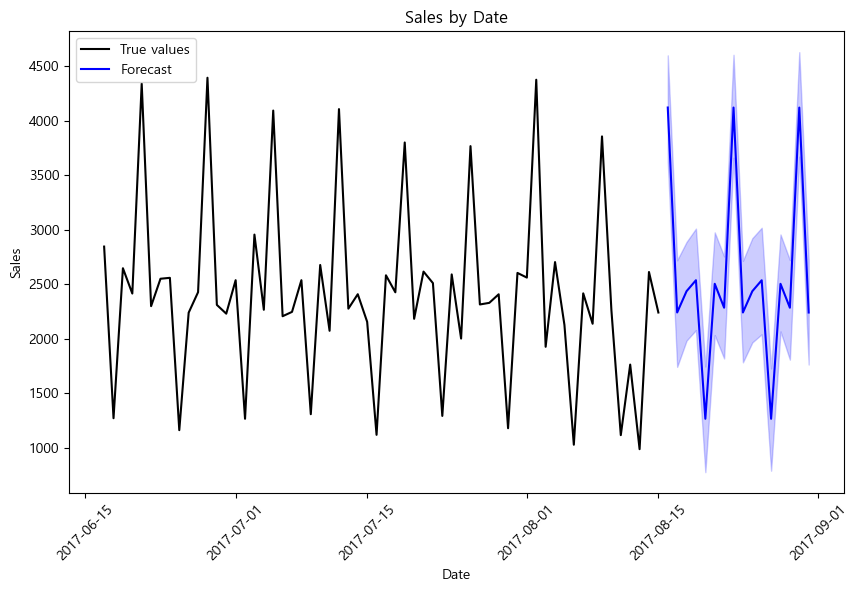

            ds         yhat   yhat_lower   yhat_upper
592 2017-08-16  4120.664833  3623.168557  4599.082354
593 2017-08-17  2240.609295  1741.366402  2719.128763
594 2017-08-18  2435.771382  1982.218459  2887.541327
595 2017-08-19  2536.494320  2079.044037  3009.896821
596 2017-08-20  1265.482594   775.659809  1744.853248
597 2017-08-21  2503.640794  2032.751595  2975.429259
598 2017-08-22  2284.280787  1818.413824  2755.070497
599 2017-08-23  4120.439522  3660.739546  4604.458553
600 2017-08-24  2240.383984  1783.027828  2714.589423
601 2017-08-25  2435.546071  1965.813588  2921.930413
602 2017-08-26  2536.269009  2040.707645  3017.611778
603 2017-08-27  1265.257283   789.035681  1726.960353
604 2017-08-28  2503.415483  2067.167529  2956.249473
605 2017-08-29  2284.055476  1807.572485  2721.008973
606 2017-08-30  4120.214211  3670.395087  4628.277238
607 2017-08-31  2240.158673  1762.868501  2722.824466


In [170]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Prophet이 요구하는 형식으로 데이터프레임 준비
plottest= temp[(temp['date']>='2016-01-01')&(temp['date']<='2017-08-15')&(temp['store_nbr']==1)&(temp['family']=='PRODUCE')]
df = plottest.rename(columns={'date': 'ds', 'sales': 'y'})

# 모델 학습
model = Prophet()
model.fit(df)

# 16일간의 예측을 위한 데이터프레임 생성
future = model.make_future_dataframe(periods=16)
forecast = model.predict(future)

# 데이터 형식을 datetime으로 변환하여 matplotlib에서 처리할 수 있도록 함
df['ds'] = pd.to_datetime(df['ds'])
forecast['ds'] = pd.to_datetime(forecast['ds'])

# 실제 값과 예측 값 시각화
plt.figure(figsize=(10, 6))

# 실제 값 플롯팅
plt.plot(df['ds'][-60:], df['y'][-60:], color="black", label="True values")

# 예측 값 플롯팅
plt.plot(forecast['ds'][-16:], forecast['yhat'][-16:], color='blue', label='Forecast')

# 예측 값의 불확실성 구간 플롯팅
plt.fill_between(forecast['ds'][-16:], forecast['yhat_lower'][-16:], forecast['yhat_upper'][-16:], color='blue', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales by Date')
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.show()

# 예측된 결과 출력
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(16))


In [9]:
import pandas as pd
import numpy as np
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.common import ListDataset
from gluonts.torch import DeepAREstimator
from gluonts.dataset.split import split
import matplotlib.pyplot as plt

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\gluonts\json.py:102: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(


In [192]:
#최종 test set을 위한 셋팅
deepAR = pd.DataFrame()
deepAR['date'] = pd.date_range(start='2017-08-16', end='2017-08-31')
deepAR['store_nbr'] = 1
deepAR['family'] = 'PRODUCE'

test['date'] = pd.to_datetime(test['date'])
filtered_test = test[(test['store_nbr'] == 1) & (test['family'] == 'PRODUCE')]
deepAR = pd.merge(deepAR, filtered_test[['date', 'onpromotion']], on='date', how='left')

In [193]:
# gluonts 돌리기 위한 데이터셋
plottest= temp[(temp['date']>='2016-01-01')&(temp['date']<='2017-08-15')&(temp['store_nbr']==1)&(temp['family']=='PRODUCE')]

df = plottest.copy()
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                                         | Out sizes   
------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 25.9 K | [[1, 1], [1, 1], [1, 1108, 4], [1, 1108], [1, 1108], [1, 16, 4]] | [1, 100, 16]
------------------------------------------------------------------------------------------------------------------------
25.9 K    Trainable params
0         Non-trainable params
25.9 K    Total params
0.104     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 8.60209 (best 8.60209), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_97\\checkpoints\\epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 8.19665 (best 8.19665), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_97\\checkpoints\\epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 7.87074 (best 7.87074), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_97\\checkpoints\\epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 7.50934 (best 7.50934), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_97\\checkpoints\\epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 7.41349 (best 7.41349),

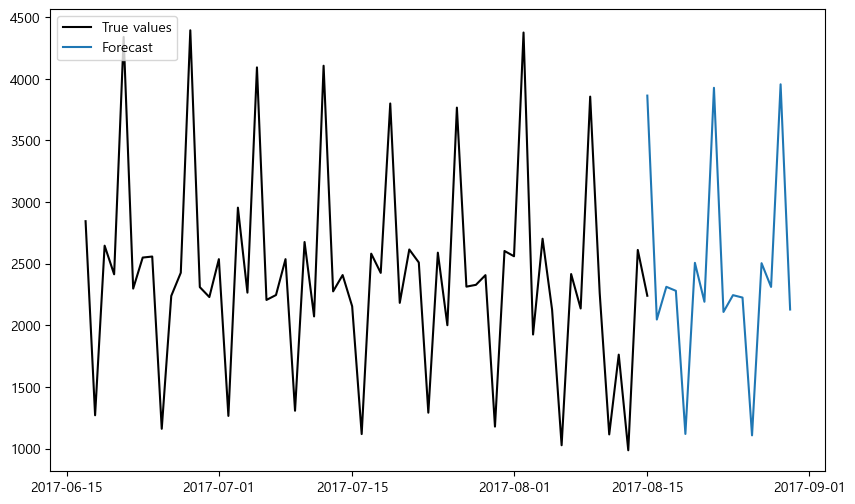

In [194]:
# sales 컬럼 생성을 위한 예측
# Prepare ListDataset
gluonts_data = ListDataset(
    [{"start": df.index[0], 
      "target": df['sales'].values}],
    freq="D"
)

# Split the data for training and testing
training_data = ListDataset(
    [{"start": df.index[0], 
      "target": df['sales'].values}],
    freq="D"
)

test_data = ListDataset(
    [{"start": df.index[0], 
      "target": df['sales'].values}],
    freq="D"
)


# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=16, freq="D", trainer_kwargs={"max_epochs": 20}
).train(training_data)

forecasts = list(model.predict(test_data))

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[-60:], df['sales'][-60:], color="black", label="True values")
for forecast in forecasts:
    plt.plot(forecast.index, forecast.mean, label="Forecast")
plt.legend(loc="upper left")
plt.show()

In [195]:
deepAR['sales']  = forecast.mean

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                                         | Out sizes   
------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 25.9 K | [[1, 1], [1, 1], [1, 1108, 4], [1, 1108], [1, 1108], [1, 16, 4]] | [1, 100, 16]
------------------------------------------------------------------------------------------------------------------------
25.9 K    Trainable params
0         Non-trainable params
25.9 K    Total params
0.104     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 8.29937 (best 8.29937), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_98\\checkpoints\\epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 7.66391 (best 7.66391), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_98\\checkpoints\\epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 7.30522 (best 7.30522), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_98\\checkpoints\\epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 6.95356 (best 6.95356), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_98\\checkpoints\\epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 6.87574 (best 6.87574),

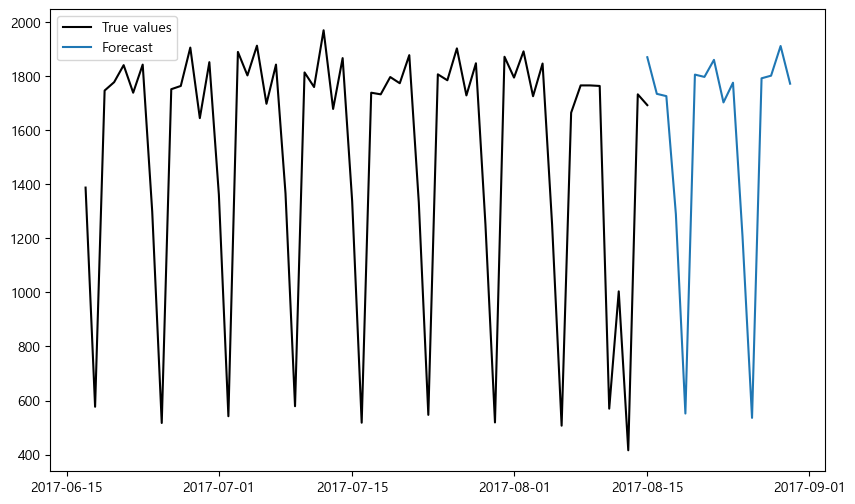

In [196]:
# transactions 컬럼 생성을 위한 예측
# Prepare ListDataset
gluonts_data = ListDataset(
    [{"start": df.index[0], 
      "target": df['transactions'].values}],
    freq="D"
)

# Split the data for training and testing
training_data = ListDataset(
    [{"start": df.index[0], 
      "target": df['transactions'].values}],
    freq="D"
)

test_data = ListDataset(
    [{"start": df.index[0], 
      "target": df['transactions'].values}],
    freq="D"
)


# Train the model and make predictions
model = DeepAREstimator(
    prediction_length=16, freq="D", trainer_kwargs={"max_epochs": 20}
).train(training_data)

forecasts = list(model.predict(test_data))

# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(df.index[-60:], df['transactions'][-60:], color="black", label="True values")
for forecast in forecasts:
    plt.plot(forecast.index, forecast.mean, label="Forecast")
plt.legend(loc="upper left")
plt.show()

In [197]:
deepAR['transactions']  = forecast.mean

In [216]:
# rolling변수 NaN 생기지 않게 과거 2주 데이터 합쳐서 데이터셋 새로 생성
deepAR_before= temp[(temp['date']>='2017-08-01')&(temp['date']<='2017-08-15')&(temp['store_nbr']==1)&(temp['family']=='PRODUCE')][['date', 'store_nbr', 'family', 'sales', 'transactions', 'onpromotion']]


In [221]:
deepAR_before

,date,store_nbr,family,sales,transactions,onpromotion
55107,2017-08-01,1,PRODUCE,2560.6100,1795.0,11
55140,2017-08-02,1,PRODUCE,4375.5522,1892.0,219
55173,2017-08-03,1,PRODUCE,1925.7610,1726.0,10
55206,2017-08-04,1,PRODUCE,2702.8030,1847.0,12
55239,2017-08-05,1,PRODUCE,2126.3410,1251.0,8
55272,2017-08-06,1,PRODUCE,1027.4420,507.0,6
55305,2017-08-07,1,PRODUCE,2416.1280,1665.0,6
55338,2017-08-08,1,PRODUCE,2137.0370,1766.0,7
55371,2017-08-09,1,PRODUCE,3855.6840,1766.0,212
55404,2017-08-10,1,PRODUCE,2261.4990,1764.0,9


In [222]:
deepAR_after= pd.concat([deepAR_before, deepAR], axis=0)

In [228]:
deepAR_after['date'] = pd.to_datetime(deepAR_after['date'])

In [224]:
deepAR_after['slope7'] = deepAR_after['sales'].rolling(7).apply(get_slope, raw=True)
deepAR_after['std7'] = deepAR_after['sales'].rolling(7).std(raw=True)
deepAR_after['mean7'] = deepAR_after['sales'].rolling(7).mean(raw=True)
deepAR_after['skew7'] = deepAR_after['sales'].rolling(7).skew()
deepAR_after['kurt7'] = deepAR_after['sales'].rolling(7).kurt()
deepAR_after['min7'] = deepAR_after['sales'].rolling(7).min()
deepAR_after['max7'] = deepAR_after['sales'].rolling(7).max()

deepAR_after['slope14'] = deepAR_after['sales'].rolling(14).apply(get_slope, raw=True)
deepAR_after['std14'] = deepAR_after['sales'].rolling(14).std(raw=True)
deepAR_after['mean14'] = deepAR_after['sales'].rolling(14).mean(raw=True)
deepAR_after['skew14'] = deepAR_after['sales'].rolling(14).skew()
deepAR_after['kurt14'] = deepAR_after['sales'].rolling(14).kurt()
deepAR_after['min14'] = deepAR_after['sales'].rolling(14).min()
deepAR_after['max14'] = deepAR_after['sales'].rolling(14).max()

C:\Users\user\AppData\Local\Temp\ipykernel_29752\2144700615.py:2: FutureWarning: Passing additional kwargs to Rolling.std has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  deepAR_after['std7'] = deepAR_after['sales'].rolling(7).std(raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_29752\2144700615.py:3: FutureWarning: Passing additional kwargs to Rolling.mean has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  deepAR_after['mean7'] = deepAR_after['sales'].rolling(7).mean(raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_29752\2144700615.py:10: FutureWarning: Passing additional kwargs to Rolling.std has no impact on the result and is deprecated. This will raise a TypeError in a future version of pandas.
  deepAR_after['std14'] = deepAR_after['sales'].rolling(14).std(raw=True)
C:\Users\user\AppData\Local\Temp\ipykernel_29752\2144700615.py:11: FutureWarning: Passing addi

In [231]:
deepAR = deepAR_after[deepAR_after['date']>='2017-08-16']

In [233]:
# day_of_week
deepAR['date'] = pd.to_datetime(deepAR['date'])
deepAR['day_of_week'] = deepAR['date'].dt.day_name()
deepAR['day_of_week'] = deepAR['day_of_week'].astype('category')
deepAR = pd.get_dummies(deepAR, columns=['day_of_week'])

# onpromotion_lag
for lag in [1]:
    deepAR[f'onpromotion_lag{lag}'] = deepAR['onpromotion'].shift(lag).fillna(0)

C:\Users\user\AppData\Local\Temp\ipykernel_29752\2443923275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deepAR['date'] = pd.to_datetime(deepAR['date'])
C:\Users\user\AppData\Local\Temp\ipykernel_29752\2443923275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deepAR['day_of_week'] = deepAR['date'].dt.day_name()
C:\Users\user\AppData\Local\Temp\ipykernel_29752\2443923275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

## 최종 예측

# Plot predictions
        plt.figure(figsize=(10, 6))
        plt.plot(df.index[-60:], df[target_column][-60:], color="black", label="True values")
        for forecast in forecasts:
            plt.plot(forecast.index, forecast.mean, label="Forecast")
        plt.legend(loc="upper left")
        plt.show()
# Create csv file
        # 변수 이름 동적으로 생성
        deepAR_variable_name = f'deepAR_{store}_{family}'

        # CSV 파일 이름 동적으로 생성
        csv_file_name = f"{deepAR_variable_name}.csv"

        # 동적으로 생성된 변수의 내용을 CSV 파일로 저장
        globals()[deepAR_variable_name].to_csv(csv_file_name, index=False)

In [ ]:
import pandas as pd
import numpy as np
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.common import ListDataset
from gluonts.torch import DeepAREstimator
from gluonts.dataset.split import split
import matplotlib.pyplot as plt

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import linregress
import numpy as np
import pandas as pd

In [16]:


# familyunique 추출
#familyunique = temp['family'].unique()
familyunique = ['AUTOMOTIVE','BEVERAGES']
all_predictions = []

# get_slope 함수 정의
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    return slope


# get_rolling 함수 정의
def get_rolling(df):
    df['slope7'] = df['sales'].rolling(7).apply(get_slope, raw=True)
    df['std7'] = df['sales'].rolling(7).std(raw=True)
    df['mean7'] = df['sales'].rolling(7).mean(raw=True)
    df['skew7'] = df['sales'].rolling(7).skew()
    df['kurt7'] = df['sales'].rolling(7).kurt()
    df['min7'] = df['sales'].rolling(7).min()
    df['max7'] = df['sales'].rolling(7).max()

    df['slope14'] = df['sales'].rolling(14).apply(get_slope, raw=True)
    df['std14'] = df['sales'].rolling(14).std(raw=True)
    df['mean14'] = df['sales'].rolling(14).mean(raw=True)
    df['skew14'] = df['sales'].rolling(14).skew()
    df['kurt14'] = df['sales'].rolling(14).kurt()
    df['min14'] = df['sales'].rolling(14).min()
    df['max14'] = df['sales'].rolling(14).max()


# gluonts deepAR 함수 정의
def get_gluonts(df, target_column):
    # Prepare ListDataset
        gluonts_data = ListDataset(
            [{"start": df.index[0], 
            "target": df[target_column].values}],
            freq="D"
        )

        # Split the data for training and testing
        training_data = ListDataset(
            [{"start": df.index[0], 
            "target": df[target_column].values}],
            freq="D"
        )

        test_data = ListDataset(
            [{"start": df.index[0], 
            "target": df[target_column].values}],
            freq="D"
        )

        # Train the model and make predictions
        model = DeepAREstimator(
            prediction_length=16, freq="D", trainer_kwargs={"max_epochs": 20}
        ).train(training_data)

        forecasts = list(model.predict(test_data))
          
        return forecasts
    

for store in range(1, 2):
    for family in familyunique:
        print(f"###################################### start store: {store}, family: {family}######################################")
        ###################################### test data set : gluonts deepAR ######################################
        
        #최종 test set을 위한 셋팅
        deepAR = pd.DataFrame()
        deepAR['date'] = pd.date_range(start='2017-08-16', end='2017-08-31')
        deepAR['store_nbr'] = store
        deepAR['family'] = family

        test['date'] = pd.to_datetime(test['date'])
        filtered_test = test[(test['store_nbr'] == store) & (test['family'] == family)]
        deepAR = pd.merge(deepAR, filtered_test[['date', 'onpromotion']], on='date', how='left')

        # gluonts 돌리기 위한 데이터셋
        df = temp[(temp['date']>='2016-01-01')&(temp['date']<='2017-08-15')&(temp['store_nbr']==store)&(temp['family']==family)]
        df['date'] = pd.to_datetime(df['date'])
        df.set_index('date', inplace=True)

        ## sales 컬럼 생성을 위한 예측
        forecast = get_gluonts(df, 'sales')

        deepAR['sales']  = forecast[0].mean

        ## transactions 컬럼 생성을 위한 예측
        # Prepare ListDataset
        forecast = get_gluonts(df, 'transactions')
       
        deepAR['transactions']  = forecast[0].mean

        # rolling: not to make NaN, concat with dataset before two weeks
        deepAR_before= temp[(temp['date']>='2017-08-01')&(temp['date']<='2017-08-15')&(temp['store_nbr']==store)&(temp['family']==family)][['date', 'store_nbr', 'family', 'sales', 'transactions', 'onpromotion']]

        deepAR_after= pd.concat([deepAR_before, deepAR], axis=0)

        deepAR_after['date'] = pd.to_datetime(deepAR_after['date'])

        # rolling
        get_rolling(deepAR_after)

        # cut date
        deepAR = deepAR_after[deepAR_after['date']>='2017-08-16']

        # day_of_week
        deepAR['date'] = pd.to_datetime(deepAR['date'])
        deepAR['day_of_week'] = deepAR['date'].dt.day_name()
        deepAR['day_of_week'] = deepAR['day_of_week'].astype('category')
        deepAR = pd.get_dummies(deepAR, columns=['day_of_week'])

        # onpromotion_lag
        for lag in [1]:
            deepAR[f'onpromotion_lag{lag}'] = deepAR['onpromotion'].shift(lag).fillna(0)
                
        # drop the useless columns       
        deepAR_origin = deepAR.copy()
        deepAR.drop(columns=['onpromotion','date', 'store_nbr', 'family', 'sales'], inplace=True)
        
        # order
        columns_order = ['onpromotion_lag1', 'transactions', 'slope7', 'std7', 'mean7', 'skew7', 'kurt7', 'min7', 'max7', 'slope14', 'std14', 'mean14', 'skew14', 'kurt14', 'min14', 'max14','day_of_week_Wednesday', 'day_of_week_Thursday', 'day_of_week_Friday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Monday', 'day_of_week_Tuesday']
        deepAR = deepAR.reindex(columns=columns_order)
        
        
        ################################### final : RandomForestRegressor ######################################      
        data = temp[(temp['year'].isin([2016, 2017])) & (temp.store_nbr == store) & (temp.family == family)][['date', 'sales', 'onpromotion_lag1', 'transactions', 'day_of_week']]
        
        # day_of_week
        data['day_of_week'] = data['day_of_week'].astype('category')
        data = pd.get_dummies(data, columns=['day_of_week'])
        
        # rolling
        get_rolling(data)
        
        data.dropna(inplace=True)
        
        # Features 및 target 설정
        X = data[['onpromotion_lag1', 'transactions', 'slope7', 'std7', 'mean7', 'skew7', 'kurt7', 'min7', 'max7', 'slope14', 'std14', 'mean14', 'skew14', 'kurt14', 'min14', 'max14','day_of_week_Wednesday', 'day_of_week_Thursday', 'day_of_week_Friday', 'day_of_week_Saturday', 'day_of_week_Sunday', 'day_of_week_Monday', 'day_of_week_Tuesday']]
        y = data['sales']

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        rf = RandomForestRegressor(n_estimators=100, random_state=42)

        rf.fit(X_train, y_train)

        # Predict
        test_pred = rf.predict(deepAR)

        # Add predictions to test_for_pred dataframe
        deepAR_origin['predicted_sales'] = test_pred


        all_predictions.append(deepAR_origin)
        print(f"###################################### end store: {store}, family: {family}######################################")
        
# Concatenate all predictions into a single dataframe
final_predictions = pd.concat(all_predictions)
final_predictions.to_csv('final_predictions.csv', index=False)
        
   


# 하나 돌리는데 1분 35초
# 1836개 돌려야 하니까 174420초는 48시간 27분
# store_nbr 1개만 돌리려면 약 53.83분 예상됨 



###################################### start store: 1, family: AUTOMOTIVE######################################


C:\Users\user\AppData\Local\Temp\ipykernel_24928\3403142102.py:82: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                                         | Out sizes   
------------------------------------------------------------------------------------------------------------------------
0 | model

Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 2.64077 (best 2.64077), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_143\\checkpoints\\epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 2.51430 (best 2.51430), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_143\\checkpoints\\epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 2.39510 (best 2.39510), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_143\\checkpoints\\epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 2.33861 (best 2.33861), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_143\\checkpoints\\epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 2.33751 (best 2.337

Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 8.21339 (best 8.21339), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_144\\checkpoints\\epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 7.70915 (best 7.70915), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_144\\checkpoints\\epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 7.23148 (best 7.23148), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_144\\checkpoints\\epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 6.91578 (best 6.91578), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_144\\checkpoints\\epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 6.77870 (best 6.778

###################################### end store: 1, family: AUTOMOTIVE######################################
###################################### start store: 1, family: BEVERAGES######################################


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightning\pytorch\trainer\configuration_validator.py:74: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.

  | Name  | Type        | Params | In sizes                                                         | Out sizes   
------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 25.9 K | [[1, 1], [1, 1], [1, 1108, 4], [1, 1108], [1, 1108], [1, 16, 4]] | [1, 100, 16]
------------------------------------------------------------------------------------------------------------------------
25.9 K    Trainable params
0         Non-trainable params
25.9 K    Total params
0.104     Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 8.28026 (best 8.28026), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_145\\checkpoints\\epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 7.81321 (best 7.81321), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_145\\checkpoints\\epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 7.51082 (best 7.51082), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_145\\checkpoints\\epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 7.32298 (best 7.32298), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_145\\checkpoints\\epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 7.22456 (best 7.224

Training: |          | 0/? [00:00<?, ?it/s]

Epoch 0, global step 50: 'train_loss' reached 8.37294 (best 8.37294), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_146\\checkpoints\\epoch=0-step=50.ckpt' as top 1
Epoch 1, global step 100: 'train_loss' reached 7.68171 (best 7.68171), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_146\\checkpoints\\epoch=1-step=100.ckpt' as top 1
Epoch 2, global step 150: 'train_loss' reached 7.20146 (best 7.20146), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_146\\checkpoints\\epoch=2-step=150.ckpt' as top 1
Epoch 3, global step 200: 'train_loss' reached 6.85245 (best 6.85245), saving model to 'c:\\Users\\user\\upstage3-python\\09.ML_project_team03\\dev\\notebooks\\lightning_logs\\version_146\\checkpoints\\epoch=3-step=200.ckpt' as top 1
Epoch 4, global step 250: 'train_loss' reached 6.77160 (best 6.771

###################################### end store: 1, family: BEVERAGES######################################
